# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **01.11.2024**

Мягкий дедлайн: **13.11.24 23:59**

Жесткий дедлайн: **15.11.24 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: 11 (некоторые классы я немного меняли, чтобы они сработали в ходе работы, но смысл остался такой же)

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0.02 балла).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

`### ваше решение тут ###`

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

In [623]:
from dataclasses import dataclass
from enum import auto
from enum import Enum
from typing import Dict
from typing import Type

import numpy as np

In [624]:
@dataclass #автоматически создает методы __init__ и __repr__ для класса.
class LearningRate:
    lambda_: float = 1e-3 #Начальная скорость обучения
    s0: float = 1 #Начальное значение
    p: float = 0.5 #Экспонента для формулы скорости обучения

    iteration: int = 0 #Счетчик итераций, инициализированный нулем.

    def __call__(self): #увеличивать счетчик итераций и вычислять новую скорость обучения на основе формулы
        """
        Calculate learning rate according to lambda (s0/(s0 + t))^p formula
        """
        self.iteration += 1
        return self.lambda_ * (self.s0 / (self.s0 + self.iteration)) ** self.p


class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

In [625]:
class BaseDescent:
    """
    A base class and templates for all functions
    """

    def __init__(self, dimension: int, lambda_: float = 1e-3, loss_function: LossFunction = LossFunction.MSE):
        """
        :param dimension: feature space dimension
        :param lambda_: learning rate parameter
        :param loss_function: optimized loss function
        """
        self.w: np.ndarray = np.random.rand(dimension) #измерение пространства признаков
        self.lr: LearningRate = LearningRate(lambda_=lambda_)
        self.loss_function: LossFunction = loss_function

    def step(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        return self.update_weights(self.calc_gradient(x, y))

    def update_weights(self, gradient: np.ndarray) -> np.ndarray:
        """
        Template for update_weights function
        Update weights with respect to gradient
        :param gradient: gradient
        :return: weight difference (w_{k + 1} - w_k): np.ndarray
        """
        pass

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        """
        Template for calc_gradient function
        Calculate gradient of loss function with respect to weights
        :param x: features array
        :param y: targets array
        :return: gradient: np.ndarray
        """
        pass

    def calc_loss(self, x: np.ndarray, y: np.ndarray) -> float:
        """
        Calculate loss for x and y with our weights
        :param x: features array
        :param y: targets array
        :return: loss: float
        """
        y_pred = self.predict(x)
        loss = np.mean((y_pred - y) ** 2)
        return loss
        raise NotImplementedError('BaseDescent calc_loss function not implemented')

    def predict(self, x: np.ndarray) -> np.ndarray:
        """
        Calculate predictions for x
        :param x: features array
        :return: prediction: np.ndarray
        """
        predictions = x @ self.w
        return predictions
        raise NotImplementedError('BaseDescent predict function not implemented')

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$. Кроме того, соответственно своему названию, она должна обновлять веса.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

In [626]:
class VanillaGradientDescent(BaseDescent):
    """
    Full gradient descent class
    """

    def update_weights(self, gradient: np.ndarray) -> np.ndarray:
        eta = self.lr()  # Получаем скорость обучения
        
        # Убедимся, что gradient имеет тип float64
        if gradient.dtype != np.float64:
            gradient = gradient.astype(np.float64)
        
        weight_diff = -eta * gradient  # Вычисляем изменение весов
        
        # Убедимся, что self.w имеет тип float64
        if self.w.dtype != np.float64:
            self.w = self.w.astype(np.float64)
        
        # Убедимся, что weight_diff имеет тип float64
        if weight_diff.dtype != np.float64:
            weight_diff = weight_diff.astype(np.float64)
        
        self.w += weight_diff  # Обновляем веса
        return weight_diff
        #raise NotImplementedError('VanillaGradientDescent update_weights function not implemented')

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        m = x.shape[0]
        y_pred = self.predict(x)
        
        # Убедимся, что результат имеет тип float64
        gradient = (2 / m) * x.T.dot(y_pred - y)
        return np.array(gradient, dtype=np.float64)  # Преобразуем в float64

    def predict(self, x: np.ndarray) -> np.ndarray:
        # Убедимся, что результат имеет тип float64
        return np.array(x.dot(self.w), dtype=np.float64)

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

In [627]:
class StochasticDescent(VanillaGradientDescent):
    """
    Stochastic gradient descent class
    """
    def __init__(self, dimension: int, lambda_: float = 1e-3, batch_size: int = 50,
                 loss_function: str = LossFunction.MSE):
        """
        :param dimension: feature space dimension
        :param lambda_: learning rate parameter
        :param batch_size: batch size (int)
        :param loss_function: optimized loss function
        """
        super().__init__(dimension, lambda_, loss_function)
        self.batch_size = batch_size

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        """
        Calculate gradient of MSE loss function with respect to weights for batch
        :param x: Input data
        :param y: Target values
        :return: Gradient of the loss function: np.ndarray
        """
        # Randomly select indices for the batch
        batch_indices = np.random.randint(0, x.shape[0], self.batch_size)
        x_batch = x[batch_indices]
        y_batch = y[batch_indices]

        # Calculate the gradient for the mini-batch
        gradient = (2 / self.batch_size) * x_batch.T @ (x_batch @ self.w - y_batch)
        return gradient
        raise NotImplementedError('StochasticDescent calc_gradient function not implemented')

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

In [628]:
class MomentumDescent(VanillaGradientDescent):
    """
    Momentum gradient descent class
    """

    def __init__(self, dimension: int, lambda_: float = 1e-3, loss_function: LossFunction = LossFunction.MSE):
        super().__init__(dimension, lambda_, loss_function)
        self.alpha: float = 0.9
        self.h: np.ndarray = np.zeros(dimension)

    def update_weights(self, gradient: np.ndarray) -> np.ndarray:
        """
        Update weights with respect to gradient
        :return: weight difference (w_{k + 1} - w_k): np.ndarray
        """
        eta = self.lr()
        self.h = self.alpha * self.h + eta * gradient
        weight_diff = -self.h
        self.w += weight_diff
        return weight_diff
        raise NotImplementedError('MomentumDescent update_weights function not implemented')

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения **(обратите внимание, что в данном домашнем задании длина шага не фиксируется)**. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

In [629]:
class Adam(VanillaGradientDescent):
    """
    Adaptive Moment Estimation gradient descent class
    """

    def __init__(self, dimension: int, lambda_: float = 1e-3, loss_function: LossFunction = LossFunction.MSE):
        super().__init__(dimension, lambda_, loss_function)
        self.eps: float = 1e-8

        self.m: np.ndarray = np.zeros(dimension)
        self.v: np.ndarray = np.zeros(dimension)

        self.beta_1: float = 0.9
        self.beta_2: float = 0.999

        self.iteration: int = 0

    def update_weights(self, gradient: np.ndarray) -> np.ndarray:
        """
        Update weights & params
        :return: weight difference (w_{k + 1} - w_k): np.ndarray
        """
        self.iteration += 1
        eta = self.lr()

        self.m = self.beta_1 * self.m + (1 - self.beta_1) * gradient
        self.v = self.beta_2 * self.v + (1 - self.beta_2) * gradient**2

        m_hat = self.m / (1 - self.beta_1**self.iteration)
        v_hat = self.v / (1 - self.beta_2**self.iteration)

        weight_diff = -eta / (np.sqrt(v_hat) + self.eps) * m_hat
        self.w += weight_diff
        return weight_diff
        raise NotImplementedError('Adagrad update_weights function not implemented')

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Веса модели надо обновлять внутри функции `update_weights`, она неспроста так называется
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

In [630]:
from __future__ import annotations

from typing import List

import numpy as np

from descents import BaseDescent
from descents import get_descent

class LinearRegression:
    """
    Linear regression class
    """

    def __init__(self, descent_config: dict, tolerance: float = 1e-4, max_iter: int = 300):
        """
        :param descent_config: gradient descent config
        :param tolerance: stopping criterion for square of euclidean norm of weight difference (float)
        :param max_iter: stopping criterion for iterations (int)
        """
        self.descent: BaseDescent = get_descent(descent_config)
        self.tolerance: float = tolerance
        self.max_iter: int = max_iter
        self.loss_history: List[float] = []

    def fit(self, x: np.ndarray, y: np.ndarray) -> 'LinearRegression':
        """
        Fitting descent weights for x and y dataset
        :param x: features array
        :param y: targets array
        :return: self
        """
        self.descent.init_weights(x.shape[1])
        self.loss_history.append(self.descent.calc_loss(x, y))

        for _ in range(self.max_iter):
            previous_weights = self.descent.w.copy()
            gradient = self.descent.calc_gradient(x,y)
            diff = self.descent.update_weights(gradient) # Use the inherited update_weights which uses self.lr internally and returns diff

            self.loss_history.append(self.descent.calc_loss(x, y))
            if np.isnan(diff).any() or (np.linalg.norm(diff)**2 < self.tolerance) :
                break

        return self

    def predict(self, x: np.ndarray) -> np.ndarray:
        """
        Predicting targets for x dataset
        :param x: features array
        :return: prediction: np.ndarray
        """
        return self.descent.predict(x)

    def calc_loss(self, x: np.ndarray, y: np.ndarray) -> float:
        """
        Calculating loss for x and y dataset
        :param x: features array
        :param y: targets array
        """
        return self.descent.calc_loss(x, y)

## Задание 3. Проверка кода (0 баллов)

In [631]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [632]:
%autoreload 2

import numpy as np
from descents import get_descent
from linear_regression import LinearRegression

In [633]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [634]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [635]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/54610/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**: https://contest.yandex.ru/contest/54610/problems/A/


* **StochasticDescent**:
https://contest.yandex.ru/contest/54610/problems/B/

* **MomentumDescent**: https://contest.yandex.ru/contest/54610/problems/C/


* **Adam**:
https://contest.yandex.ru/contest/54610/problems/D/

* **LinearRegression**:

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте (и напишите): какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте (и напишите): какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [636]:
import numpy as np
import pandas as pd  # при желании, можете заменить на polars/pyspark или что угодно, что вам нравится

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [637]:
data = pd.read_csv('autos.csv')  # разумеется, если вы используете не pandas, это надо поменять

In [638]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'Распределение стоимости автомобиля'}, xlabel='price', ylabel='Count'>

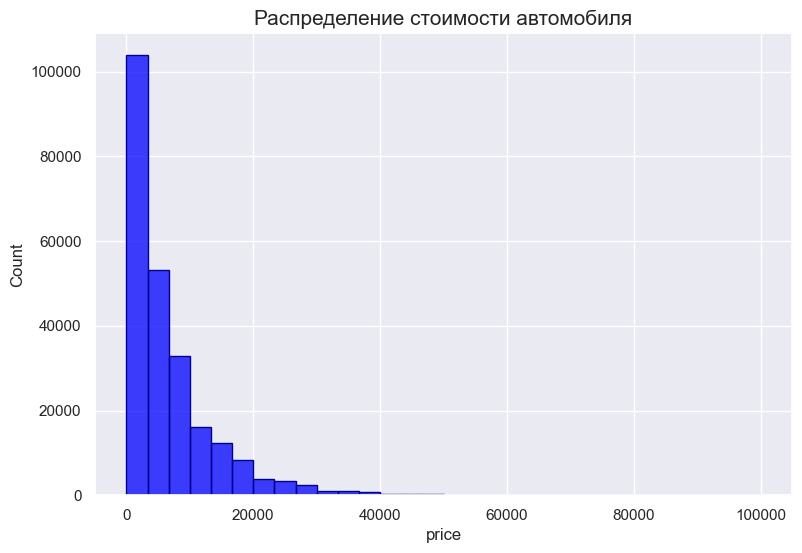

In [639]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_title('Распределение стоимости автомобиля', fontsize=15)
sns.histplot(data.price,
             bins=30,
             ax=ax,
             color='blue',
             edgecolor='darkblue')

In [640]:
data['price'].describe()

count    241190.000000
mean       6887.741892
std        8024.451993
min           1.000000
25%        1750.000000
50%        4100.000000
75%        8999.000000
max       99999.000000
Name: price, dtype: float64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


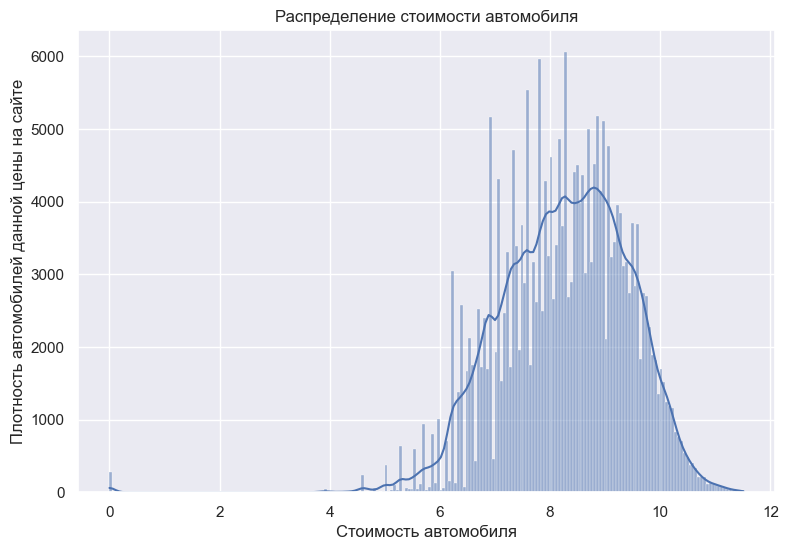

In [641]:
plt.figure(figsize=(9, 6))
sns.histplot(np.log(data['price'].values), kde=True).set_title("Распределение стоимости автомобиля")
plt.xlabel('Cтоимость автомобиля')
plt.ylabel('Плотность автомобилей данной цены на сайте')
plt.show()

В данных присутствуют выбросы. Логарифмирование целевой переменной не сильно позволяет справиться с проблемой разроненности данных, поэтому можно оставить не логарифмированные данные, и поработать с выбросами

In [642]:
quantile_95 = data['price'].quantile(0.95)

# Фильтрация данных, оставляя только значения, которые выше 0.95 квантиля
data = data[(data['price'] > quantile_95)]

In [643]:
data['price'].describe()

count    12008.000000
mean     32296.933378
std      11742.287801
min      22100.000000
25%      24850.000000
50%      28000.000000
75%      35000.000000
max      99999.000000
Name: price, dtype: float64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'Распределение стоимости автомобиля'}, xlabel='price', ylabel='Count'>

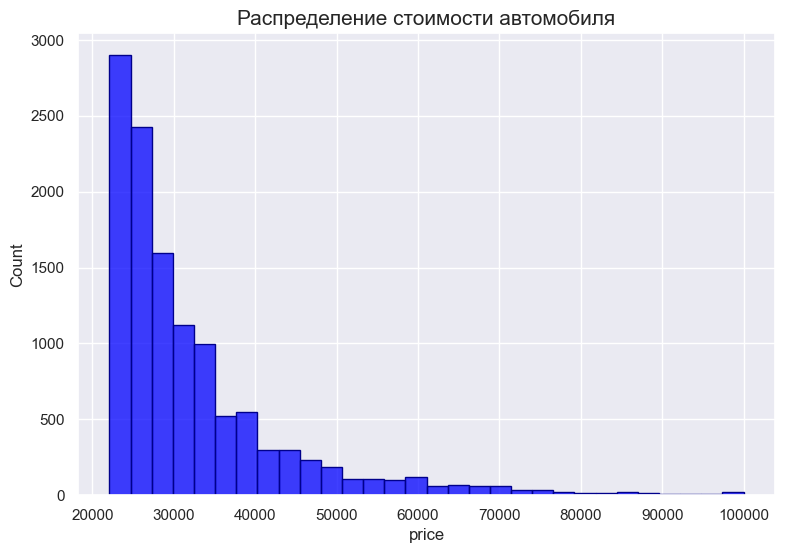

In [644]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_title('Распределение стоимости автомобиля', fontsize=15)
sns.histplot(data.price,
             bins=30,
             ax=ax,
             color='blue',
             edgecolor='darkblue')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


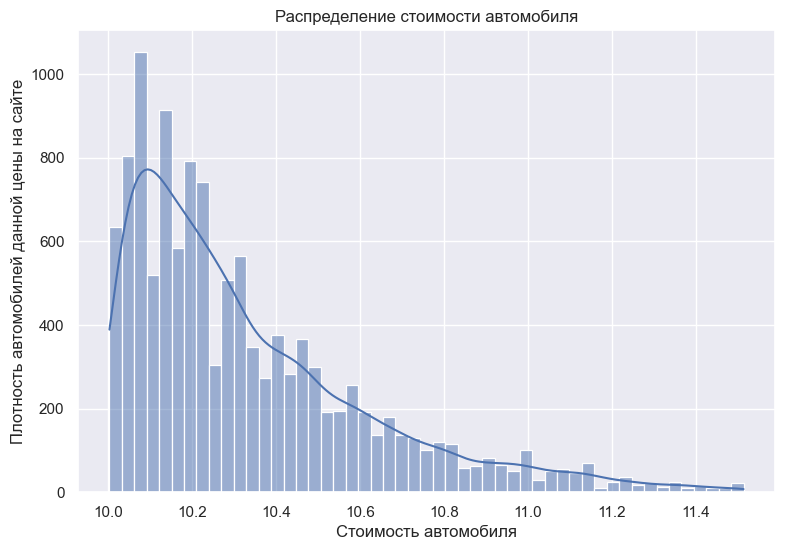

In [645]:
plt.figure(figsize=(9, 6))
sns.histplot(np.log(data['price'].values), kde=True).set_title("Распределение стоимости автомобиля")
plt.xlabel('Cтоимость автомобиля')
plt.ylabel('Плотность автомобилей данной цены на сайте')
plt.show()

Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака

Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

In [646]:
categorical = ['brand','model','vehicleType','gearbox','fuelType','notRepairedDamage']
numeric = ['powerPS','kilometer','autoAgeMonths']
other = []

# YOUR CODE (EDA):

In [647]:
data['bias'] = 1
#Это позволяет модели подстраивать смещение (b) во время обучения и находить оптимальную линию регрессии, которая не обязательно проходит через начало координат.
other += ['bias']

x = data[categorical + numeric + other]
y = data['price']

In [648]:
y

26        39600
50        23490
53        22999
81        41900
106       25000
          ...  
241088    24000
241089    32900
241092    44900
241162    23900
241189    28990
Name: price, Length: 12008, dtype: int64

In [649]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Создаем ColumnTransformer
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
], remainder='passthrough')

# Применяем преобразование
x = column_transformer.fit_transform(x)

In [650]:
print(type(x))

<class 'scipy.sparse._csr.csr_matrix'>


In [651]:
print(type(y))

<class 'pandas.core.series.Series'>


In [652]:
#y = y.reset_index(drop=True)

In [653]:
x = x.toarray()

In [654]:
x

array([[ 0.        ,  0.        ,  1.        , ..., -0.87277504,
        -0.55783356,  1.        ],
       [ 0.        ,  0.        ,  1.        , ..., -0.65189803,
        -0.39626333,  1.        ],
       [ 0.        ,  0.        ,  0.        , ..., -0.43102102,
        -0.22226463,  1.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.67336401,
        -0.20983615,  1.        ],
       [ 0.        ,  0.        ,  1.        , ...,  1.77774904,
        -0.1228368 ,  1.        ],
       [ 0.        ,  0.        ,  1.        , ..., -0.43102102,
        -0.43354877,  1.        ]])

In [655]:
y = y.to_numpy(dtype=np.float64)

In [656]:
y

array([39600., 23490., 22999., ..., 44900., 23900., 28990.])

In [657]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Пример данных (замените на ваши данные)
# x = pd.DataFrame(...)  # Ваши обучающие данные
# y = pd.Series(...)     # Ваши целевые данные

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Разделение тестовых данных на валидационные и тестовые выборки
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Проверьте размеры выборок
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'X_val shape: {X_val.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')
print(f'y_val shape: {y_val.shape}')

X_train shape: (9606, 199)
X_test shape: (1201, 199)
X_val shape: (1201, 199)
y_train shape: (9606,)
y_test shape: (1201,)
y_val shape: (1201,)


## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [663]:
from __future__ import annotations

from typing import List

import numpy as np

from descents import BaseDescent
from descents import get_descent

class LinearRegression:
    """
    Linear regression class
    """

    def __init__(self, descent_config: dict, tolerance: float = 1e-4, max_iter: int = 300):
        """
        :param descent_config: gradient descent config
        :param tolerance: stopping criterion for square of euclidean norm of weight difference (float)
        :param max_iter: stopping criterion for iterations (int)
        """
        self.descent: BaseDescent = get_descent(descent_config)
        self.tolerance: float = tolerance
        self.max_iter: int = max_iter
        self.loss_history: List[float] = []

    def fit(self, x: np.ndarray, y: np.ndarray) -> LinearRegression:
        """
        Fitting descent weights for x and y dataset
        :param x: features array
        :param y: targets array
        :return: self
        """
        self.descent.init_weights(x.shape[1])
        self.loss_history.append(self.descent.calc_loss(x, y))

        for _ in range(self.max_iter):
            previous_weights = self.descent.w.copy()
            gradient = self.descent.calc_gradient(x,y)
            diff = self.descent.update_weights(gradient) # Use the inherited update_weights which uses self.lr internally and returns diff

            self.loss_history.append(self.descent.calc_loss(x, y))
            if np.isnan(diff).any() or (np.linalg.norm(diff)**2 < self.tolerance) :
                break

        return self

    def predict(self, x: np.ndarray) -> np.ndarray:
        """
        Predicting targets for x dataset
        :param x: features array
        :return: prediction: np.ndarray
        """
        return self.descent.predict(x)

    def calc_loss(self, x: np.ndarray, y: np.ndarray) -> float:
        """
        Calculating loss for x and y dataset
        :param x: features array
        :param y: targets array
        """
        return self.descent.calc_loss(x, y)

In [659]:
import numpy as np
from sklearn.metrics import r2_score
from dataclasses import dataclass
from enum import Enum, auto

# Define necessary classes and methods (as provided in your code)

@dataclass
class LearningRate:
    lambda_: float = 1e-3
    s0: float = 1
    p: float = 0.5

    iteration: int = 0

    def __call__(self): 
        """
        Calculate learning rate according to lambda (s0/(s0 + t))^p formula
        """
        self.iteration += 1
        return self.lambda_ * (self.s0 / (self.s0 + self.iteration)) ** self.p


class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()


class BaseDescent:
    """
    A base class and templates for all functions
    """

    def __init__(self, dimension: int, lambda_: float = 1e-3, loss_function: LossFunction = LossFunction.MSE):
        """
        :param dimension: feature space dimension
        :param lambda_: learning rate parameter
        :param loss_function: optimized loss function
        """
        self.w: np.ndarray = np.random.rand(dimension)
        self.lr: LearningRate = LearningRate(lambda_=lambda_)
        self.loss_function: LossFunction = loss_function

    def step(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        return self.update_weights(self.calc_gradient(x, y))

    def update_weights(self, gradient: np.ndarray) -> np.ndarray:
        """
        Template for update_weights function
        Update weights with respect to gradient
        :param gradient: gradient
        :return: weight difference (w_{k + 1} - w_k): np.ndarray
        """
        pass

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        """
        Template for calc_gradient function
        Calculate gradient of loss function with respect to weights
        :param x: features array
        :param y: targets array
        :return: gradient: np.ndarray
        """
        pass

    def calc_loss(self, x: np.ndarray, y: np.ndarray) -> float:
        """
        Calculate loss for x and y with our weights
        :param x: features array
        :param y: targets array
        :return: loss: float
        """
        y_pred = self.predict(x)
        loss = np.mean((y_pred - y) ** 2)
        return loss

    def predict(self, x: np.ndarray) -> np.ndarray:
        """
        Calculate predictions for x
        :param x: features array
        :return: prediction: np.ndarray
        """
        predictions = x @ self.w
        return predictions

#небольшая корректировка класса, чтобы код работал корректно 
class VanillaGradientDescent(BaseDescent):
    """
    Full gradient descent class
    """
    def update_weights(self, gradient: np.ndarray) -> np.ndarray:
        eta = self.lr()  # Получаем скорость обучения
        
        # Убедимся, что gradient имеет тип float64
        if gradient.dtype != np.float64:
            gradient = gradient.astype(np.float64)
        
        weight_diff = -eta * gradient  # Вычисляем изменение весов
        
        # Убедимся, что self.w имеет тип float64
        if self.w.dtype != np.float64:
            self.w = self.w.astype(np.float64)
        
        # Убедимся, что weight_diff имеет тип float64
        if weight_diff.dtype != np.float64:
            weight_diff = weight_diff.astype(np.float64)
        
        self.w += weight_diff  # Обновляем веса
        return weight_diff
        #raise NotImplementedError('VanillaGradientDescent update_weights function not implemented')

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        m = x.shape[0]
        y_pred = self.predict(x)
        
        # Убедимся, что результат имеет тип float64
        gradient = (2 / m) * x.T.dot(y_pred - y)
        return np.array(gradient, dtype=np.float64)  # Преобразуем в float64

    def predict(self, x: np.ndarray) -> np.ndarray:
        # Убедимся, что результат имеет тип float64
        return np.array(x.dot(self.w), dtype=np.float64)


class StochasticDescent(VanillaGradientDescent):
    """
    Stochastic gradient descent class
    """

    def __init__(self, dimension: int, lambda_: float = 1e-3, batch_size: int = 50,
                 loss_function: LossFunction = LossFunction.MSE):
        """
        :param batch_size: batch size (int)
        """
        super().__init__(dimension, lambda_, loss_function)
        self.batch_size = batch_size

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        # TODO: implement calculating gradient function
        batch_indices = np.random.randint(0, x.shape[0], self.batch_size)
        x_batch = x[batch_indices]
        y_batch = y[batch_indices]

        # Calculate the gradient for the mini-batch
        gradient = (2 / self.batch_size) * x_batch.T @ (x_batch @ self.w - y_batch)
        return gradient
        raise NotImplementedError('StochasticDescent calc_gradient function not implemented')
    

class MomentumDescent(VanillaGradientDescent):
    """
    Momentum gradient descent class
    """

    def __init__(self, dimension: int, lambda_: float = 1e-3, loss_function: LossFunction = LossFunction.MSE):
        super().__init__(dimension, lambda_, loss_function)
        self.alpha: float = 0.9
        self.h: np.ndarray = np.zeros(dimension)

    def update_weights(self, gradient: np.ndarray) -> np.ndarray:
        eta = self.lr()
        self.h = self.alpha * self.h + eta * gradient
        weight_diff = -self.h
        self.w += weight_diff
        return weight_diff


class Adam(VanillaGradientDescent):
    """
    Adaptive Moment Estimation gradient descent class
    """

    def __init__(self, dimension: int, lambda_: float = 1e-3, loss_function: LossFunction = LossFunction.MSE):
        super().__init__(dimension, lambda_, loss_function)
        self.eps: float = 1e-8

        self.m: np.ndarray = np.zeros(dimension)
        self.v: np.ndarray = np.zeros(dimension)

        self.beta_1: float = 0.9
        self.beta_2: float = 0.999

        self.iteration_adam: int = 0  # Use a different iteration counter for Adam

    def update_weights(self, gradient: np.ndarray) -> np.ndarray:
        self.iteration_adam += 1  # Increment Adam's iteration counter
        eta = self.lr()

        self.m = self.beta_1 * self.m + (1 - self.beta_1) * gradient
        self.v = self.beta_2 * self.v + (1 - self.beta_2) * gradient**2

        m_hat = self.m / (1 - self.beta_1**self.iteration_adam)
        v_hat = self.v / (1 - self.beta_2**self.iteration_adam)

        weight_diff = -eta / (np.sqrt(v_hat) + self.eps) * m_hat
        self.w += weight_diff
        return weight_diff

# Определите методы, которые хотите оценить
methods = {
    'VanillaGradientDescent': VanillaGradientDescent,
    'StochasticDescent': StochasticDescent,
    'MomentumDescent': MomentumDescent,
    'Adam': Adam,
}

# Определите сетку значений для lambda_ (логарифмическая решётка)
lambda_grid = np.logspace(-6, 0, num=7)  # от 1e-6 до 1 (включительно)

# Инициализируем словарь для хранения результатов
results = {}

# Определите критерии сходимости
max_iterations = 100
tolerance = 1e-6

# Получите количество признаков из X_train
num_features = X_train.shape[1]

# Инициализируем словарь для хранения истории потерь
loss_histories = {}

for method_name, method_class in methods.items():
    print(f"Evaluating method: {method_name}")
    best_lambda = None
    best_val_loss = float('inf')
    best_weights = None
    best_iterations = None
    best_model = None  # Для хранения модели с лучшим lambda_

    for lambda_ in lambda_grid:
        print(f"  Testing lambda_: {lambda_}")
        # Инициализируем модель
        if method_name == 'StochasticDescent':
            model = method_class(dimension=num_features, lambda_=lambda_, batch_size=50)
        else:
            model = method_class(dimension=num_features, lambda_=lambda_)
        
        # Сброс счетчиков и инициализация параметров
        model.lr.iteration = 0
        if hasattr(model, 'iteration_adam'):
            model.iteration_adam = 0
        if hasattr(model, 'h'):
            model.h = np.zeros(num_features)
        if hasattr(model, 'm'):
            model.m = np.zeros(num_features)
            model.v = np.zeros(num_features)
        model.w = np.random.rand(num_features)  # Переинициализируем веса
        
        # Цикл обучения
        prev_loss = float('inf')
        for iteration in range(max_iterations):
            gradient = model.calc_gradient(X_train, y_train)
            weight_diff = model.update_weights(gradient)
            train_loss = model.calc_loss(X_train, y_train)
            
            # Проверка критерия сходимости
            if abs(prev_loss - train_loss) < tolerance:
                break
            prev_loss = train_loss
        
        # Вычисляем ошибку на валидационной выборке
        val_loss = model.calc_loss(X_val, y_val)
        print(f"    Validation loss: {val_loss}")
        
        # Обновляем лучший lambda_, если производительность улучшилась
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_lambda = lambda_
            best_weights = model.w.copy()
            best_iterations = iteration + 1  # Добавляем 1, так как итерации начинаются с 0
            best_model = model  # Сохраняем модель с лучшим lambda_
    
    print(f"Best lambda_ for {method_name}: {best_lambda}")
    print(f"Validation loss: {best_val_loss}")
    print(f"Iterations until convergence: {best_iterations}")
    
    # Теперь обучаем модель снова с лучшим lambda_ и собираем историю потерь
    if method_name == 'StochasticDescent':
        model = method_class(dimension=num_features, lambda_=best_lambda, batch_size=50)
    else:
        model = method_class(dimension=num_features, lambda_=best_lambda)
    
    # Сброс счетчиков и инициализация параметров
    model.lr.iteration = 0
    if hasattr(model, 'iteration_adam'):
        model.iteration_adam = 0
    if hasattr(model, 'h'):
        model.h = np.zeros(num_features)
    if hasattr(model, 'm'):
        model.m = np.zeros(num_features)
        model.v = np.zeros(num_features)
    model.w = np.random.rand(num_features)  # Переинициализируем веса
    
    # Инициализируем список для хранения потерь
    loss_history = []
    
    # Цикл обучения с записью истории потерь
    prev_loss = float('inf')
    for iteration in range(max_iterations):
        gradient = model.calc_gradient(X_train, y_train)
        weight_diff = model.update_weights(gradient)
        train_loss = model.calc_loss(X_train, y_train)
        loss_history.append(train_loss)
        
        # Проверка критерия сходимости
        if abs(prev_loss - train_loss) < tolerance:
            break
        prev_loss = train_loss
    
    # Сохраняем историю потерь
    loss_histories[method_name] = loss_history
    
    # Используем веса после сходимости
    w_converged = model.w.copy()
    
    # Вычисляем ошибки на обучающей и тестовой выборках
    train_loss = model.calc_loss(X_train, y_train)
    test_loss = model.calc_loss(X_test, y_test)
    
    # Вычисляем коэффициенты детерминации R²
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Сохраняем результаты
    results[method_name] = {
        'best_lambda': best_lambda,
        'train_loss': train_loss,
        'test_loss': test_loss,
        'r2_train': r2_train,
        'r2_test': r2_test,
        'iterations': iteration + 1  # Добавляем 1, так как итерации начинаются с 0
    }
    
    print(f"Training loss: {train_loss}")
    print(f"Test loss: {test_loss}")
    print(f"R^2 on training set: {r2_train}")
    print(f"R^2 on test set: {r2_test}")
    print(f"Iterations until convergence: {iteration + 1}\n")

# После этого можно также вывести сводку результатов
print("Summary of results:")
for method_name, result in results.items():
    print(f"Method: {method_name}")
    print(f"  Best lambda_: {result['best_lambda']}")
    print(f"  Training loss: {result['train_loss']}")
    print(f"  Test loss: {result['test_loss']}")
    print(f"  R^2 on training set: {result['r2_train']}")
    print(f"  R^2 on test set: {result['r2_test']}")
    print(f"  Iterations until convergence: {result['iterations']}\n")

Evaluating method: VanillaGradientDescent
  Testing lambda_: 1e-06
    Validation loss: 1218638203.4209943
  Testing lambda_: 1e-05
    Validation loss: 1216350043.8281326
  Testing lambda_: 0.0001
    Validation loss: 1193317612.9862862
  Testing lambda_: 0.001
    Validation loss: 988548230.523925
  Testing lambda_: 0.01
    Validation loss: 230018741.67966205
  Testing lambda_: 0.1
    Validation loss: 91263633.1201135
  Testing lambda_: 1.0
    Validation loss: 71256361.8558945
Best lambda_ for VanillaGradientDescent: 1.0
Validation loss: 71256361.8558945
Iterations until convergence: 100
Training loss: 68809857.04342556
Test loss: 69767668.53694424
R^2 on training set: 0.4931474375474866
R^2 on test set: 0.5103509663540954
Iterations until convergence: 100

Evaluating method: StochasticDescent
  Testing lambda_: 1e-06
    Validation loss: 1218644924.0007603
  Testing lambda_: 1e-05
    Validation loss: 1216283237.3776963
  Testing lambda_: 0.0001
    Validation loss: 1192859577.83

In [664]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, r2_score
# Алгоритм достиг точки, где дальнейшие итерации не приводят к значительному улучшению функции потер
# Определение логарифмической сетки для перебора lambda
lambdas = np.logspace(-3, 3, 7)

# Инициализация словарей для хранения результатов
results = {}

# Перебор методов
methods = {
    'LinearRegression': LinearRegression() }

for name, model in methods.items():
    best_lambda = None
    best_val_error = float('inf')
    iterations = None  # Количество итераций (если применимо)

    if name != 'LinearRegression':
        # Подбор lambda для Ridge и Lasso
        for lambda_ in lambdas:
            model.set_params(alpha=lambda_)
            model.fit(X_train, y_train)
            y_val_pred = model.predict(X_val)
            val_error = mean_absolute_error(y_val, y_val_pred)

            if val_error < best_val_error:
                best_val_error = val_error
                best_lambda = lambda_
                if hasattr(model, 'n_iter_'):
                    iterations = model.n_iter_
    else:
        # Линейная регрессия не имеет параметра lambda
        model.fit(X_train, y_train)
        y_val_pred = model.predict(X_val)
        best_val_error = mean_absolute_error(y_val, y_val_pred)

    # Обучение с наилучшим lambda (если применимо)
    if best_lambda is not None:
        model.set_params(alpha=best_lambda)
    model.fit(X_train, y_train)

    # Расчет ошибок и R^2
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_error = mean_absolute_error(y_train, y_train_pred) # Используем MAE
    test_error = mean_absolute_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Сохранение результатов
    results[name] = {
        'best_lambda': best_lambda,
        'train_error': train_error,
        'test_error': test_error,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'iterations': iterations
    }

# Вывод результатов
for name, res in results.items():
    print(f"Method: {name}")
    print(f"  Best lambda: {res['best_lambda']}")
    print(f"  Train error: {res['train_error']}")
    print(f"  Test error: {res['test_error']}")
    print(f"  Train R^2: {res['train_r2']}")
    print(f"  Test R^2: {res['test_r2']}")
    print(f"  Iterations: {res['iterations']}")
    print("-" * 20)

Method: LinearRegression
  Best lambda: None
  Train error: 5214.995940037476
  Test error: 7743267607279.346
  Train R^2: 0.5426310520715693
  Test R^2: -1.684644587667505e+20
  Iterations: None
--------------------


### Задание 5.2. Сравнение методов (1 балла)

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

`### ваше решение тут ###`

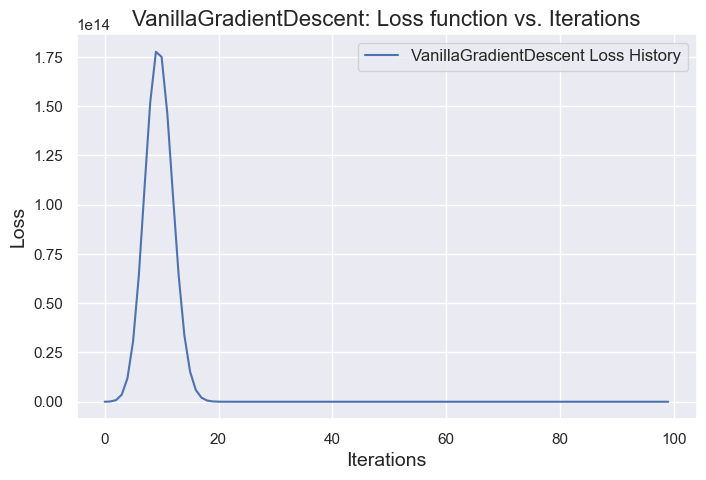

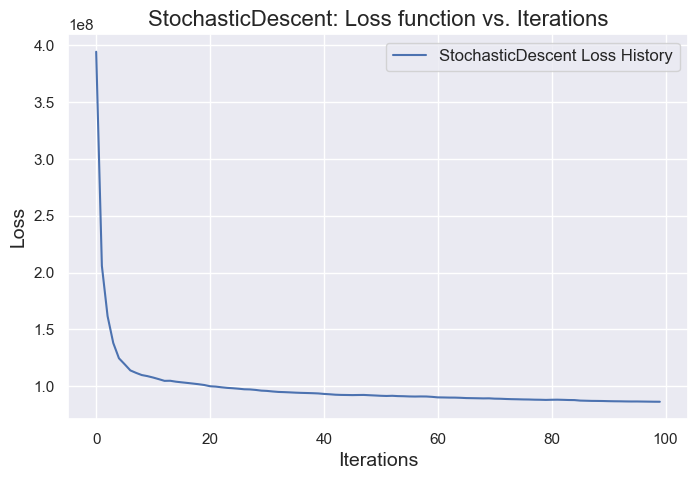

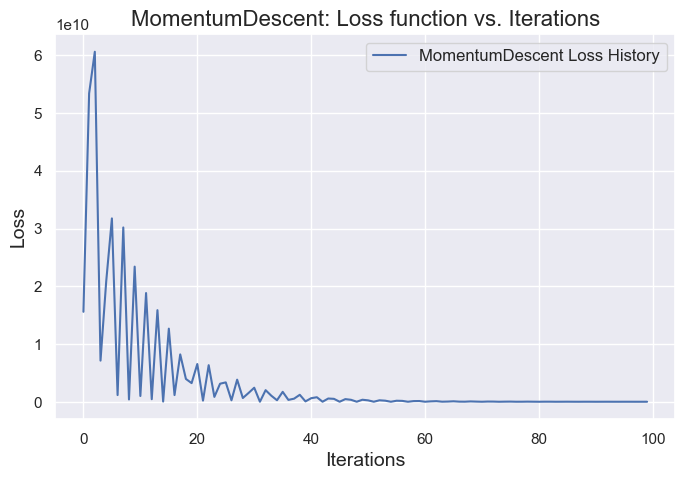

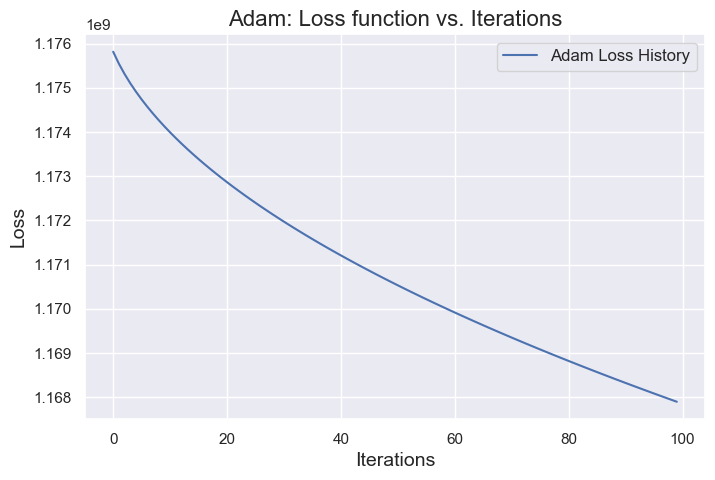

In [667]:
# Отдельные графики для каждого метода
for method_name, loss_history in loss_histories.items():
    plt.figure(figsize=(8, 5))
    plt.plot(loss_history, label=f'{method_name} Loss History')
    plt.title(f'{method_name}: Loss function vs. Iterations', fontsize=16)
    plt.xlabel('Iterations', fontsize=14)
    plt.ylabel('Loss', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()


* **Выводы**:
  * **VanillaGradientDescent**: качество модели на тестовой и обучающей выборках неплохое.  MSE ниже,чем при использовании стохастического градиентого спуска
  * **StochasticDescent**: качество модели плохое. MSE высокое. Хуже только при использовании метода Adam.
  * **MomentumDescent**: качество модели лучше, чем у остальных методов. MSE наименьшее по сравнению с другими методами.
  * **Adam**: качество модели плохое. Функция потерь большая.
  * Качество модели на при использовании метода **LinearRegression** на обучающей выборке хорошее, на тестовой плохое. Аналогичная ситуация с функцией потерь. 


Таким образом,лучшей моделью является **MomentumDescent**

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска.

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча. _(под сходимостью понимается достижение критерия останова)_
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [668]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

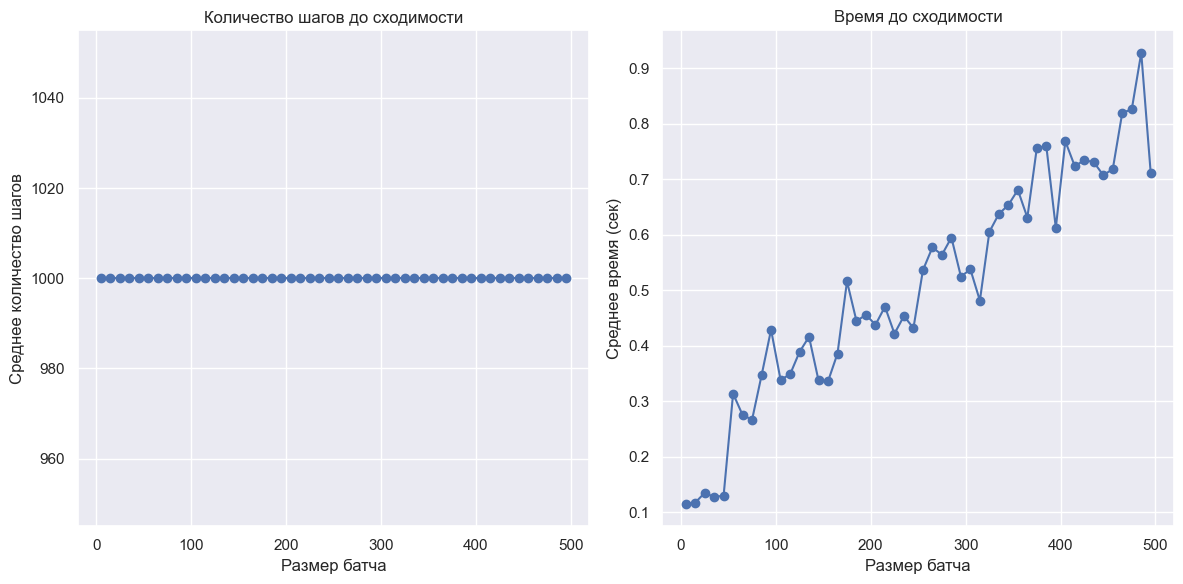

In [669]:
import numpy as np
import time
import matplotlib.pyplot as plt


def run_stochastic_descent(X_train, y_train, batch_sizes, num_runs=10, max_iterations=1000, tolerance=1e-3):
    results = {}
    for b in batch_sizes:
        times = []
        iterations = []
        for _ in range(num_runs):
            indices = np.arange(X_train.shape[0])
            np.random.shuffle(indices)
            y = y_train[indices]  # Используем индексацию numpy

            start_time = time.time()
            model = StochasticDescent(X_train.shape[1], batch_size=b)
            current_loss = float('inf')
            iteration = 0
            
            while iteration < max_iterations:
                batch_indices = np.random.choice(X_train.shape[0], b, replace=False)
                X_batch = X_train[batch_indices]
                y_batch = y[batch_indices]  # Используем индексацию numpy
                
                gradient = model.calc_gradient(X_batch, y_batch)
                model.update_weights(gradient)
                new_loss = model.calc_loss(X_batch, y_batch)
                
                if abs(new_loss - current_loss) < tolerance:
                    break
                current_loss = new_loss
                iteration += 1
            end_time = time.time()
            times.append(end_time - start_time)
            iterations.append(iteration)
        results[b] = {'time': np.mean(times), 'iterations': np.mean(iterations)}

    return results

batch_sizes = np.arange(5, 500, 10)
results = run_stochastic_descent(X_train, y_train, batch_sizes)

# Построение графиков
iterations_data = [results[b]['iterations'] for b in batch_sizes]
times_data = [results[b]['time'] for b in batch_sizes]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(batch_sizes, iterations_data, marker='o')
plt.title('Количество шагов до сходимости')
plt.xlabel('Размер батча')
plt.ylabel('Среднее количество шагов')

plt.subplot(1, 2, 2)
plt.plot(batch_sizes, times_data, marker='o')
plt.title('Время до сходимости')
plt.xlabel('Размер батча')
plt.ylabel('Среднее время (сек)')

plt.tight_layout()
plt.show()

Чем больше батч в стохастическом градиентном спуске,тем больше среднее время до сходимости. Более точное вычисление градиента и более стабильное обучение, но более медленная сходимость весов. 

In [670]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train: (9606, 199)
Shape of y_train: (9606,)


`### ваше решение тут ###`

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**:

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [672]:
from dataclasses import dataclass
from enum import auto
from enum import Enum
from typing import Dict
from typing import Type

import numpy as np


@dataclass
class LearningRate:
    lambda_: float = 1e-3
    s0: float = 1
    p: float = 0.5

    iteration: int = 0

    def __call__(self): 
        """
        Calculate learning rate according to lambda (s0/(s0 + t))^p formula
        """
        self.iteration += 1
        return self.lambda_ * (self.s0 / (self.s0 + self.iteration)) ** self.p


class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()


class BaseDescent:
    """
    A base class and templates for all functions
    """

    def __init__(self, dimension: int, lambda_: float = 1e-3, loss_function: LossFunction = LossFunction.MSE):
        """
        :param dimension: feature space dimension
        :param lambda_: learning rate parameter
        :param loss_function: optimized loss function
        """
        self.w: np.ndarray = np.random.rand(dimension)
        self.lr: LearningRate = LearningRate(lambda_=lambda_)
        self.loss_function: LossFunction = loss_function

    def step(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        return self.update_weights(self.calc_gradient(x, y))

    def update_weights(self, gradient: np.ndarray) -> np.ndarray:
        """
        Template for update_weights function
        Update weights with respect to gradient
        :param gradient: gradient
        :return: weight difference (w_{k + 1} - w_k): np.ndarray
        """
        pass

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        """
        Template for calc_gradient function
        Calculate gradient of loss function with respect to weights
        :param x: features array
        :param y: targets array
        :return: gradient: np.ndarray
        """
        pass

    def calc_loss(self, x: np.ndarray, y: np.ndarray) -> float:
        """
        Calculate loss for x and y with our weights
        :param x: features array
        :param y: targets array
        :return: loss: float
        """
        y_pred = self.predict(x)
        loss = np.mean((y_pred - y) ** 2)
        return loss

    def predict(self, x: np.ndarray) -> np.ndarray:
        """
        Calculate predictions for x
        :param x: features array
        :return: prediction: np.ndarray
        """
        predictions = x @ self.w
        return predictions
        
class BaseDescentReg(BaseDescent):
    """
    A base class with regularization
    """

    def __init__(self, *args, mu: float = 0, **kwargs):
        """
        :param mu: regularization coefficient (float)
        """
        super().__init__(*args, **kwargs)

        self.mu = mu

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        """
        Calculate gradient of loss function and L2 regularization with respect to weights
        """
        l2_gradient: np.ndarray = 2 * self.w  # TODO: replace with L2 gradient calculation

        return super().calc_gradient(x, y) + l2_gradient * self.mu


class VanillaGradientDescentReg(BaseDescentReg, VanillaGradientDescent):
    """
    Full gradient descent with regularization class
    """


class StochasticDescentReg(BaseDescentReg, StochasticDescent):
    """
    Stochastic gradient descent with regularization class
    """


class MomentumDescentReg(BaseDescentReg, MomentumDescent):
    """
    Momentum gradient descent with regularization class
    """


class AdamReg(BaseDescentReg, Adam):
    """
    Adaptive gradient algorithm with regularization class
    """

In [688]:
from dataclasses import dataclass
from enum import auto
from enum import Enum
from typing import Dict
from typing import Type

import numpy as np


@dataclass
class LearningRate:
    lambda_: float = 1e-3
    s0: float = 1
    p: float = 0.5

    iteration: int = 0

    def __call__(self):
        """
        Calculate learning rate according to lambda (s0/(s0 + t))^p formula
        """
        self.iteration += 1
        return self.lambda_ * (self.s0 / (self.s0 + self.iteration)) ** self.p


class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()


class BaseDescent:
    """
    A base class and templates for all functions
    """

    def __init__(self, dimension: int, lambda_: float = 1e-3, loss_function: LossFunction = LossFunction.MSE):
        """
        :param dimension: feature space dimension
        :param lambda_: learning rate parameter
        :param loss_function: optimized loss function
        """
        self.w: np.ndarray = np.random.rand(dimension)
        self.lr: LearningRate = LearningRate(lambda_=lambda_)
        self.loss_function: LossFunction = loss_function

    def step(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        return self.update_weights(self.calc_gradient(x, y))

    def update_weights(self, gradient: np.ndarray) -> np.ndarray:
        """
        Template for update_weights function
        Update weights with respect to gradient
        :param gradient: gradient
        :return: weight difference (w_{k + 1} - w_k): np.ndarray
        """
        raise NotImplementedError

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        """
        Template for calc_gradient function
        Calculate gradient of loss function with respect to weights
        :param x: features array
        :param y: targets array
        :return: gradient: np.ndarray
        """
        raise NotImplementedError

    def calc_loss(self, x: np.ndarray, y: np.ndarray) -> float:
        """
        Calculate loss for x and y with our weights
        :param x: features array
        :param y: targets array
        :return: loss: float
        """
        y_pred = self.predict(x)
        loss = np.mean((y_pred - y) ** 2)  # MSE loss by default
        return loss

    def predict(self, x: np.ndarray) -> np.ndarray:
        """
        Calculate predictions for x
        :param x: features array
        :return: prediction: np.ndarray
        """
        predictions = x @ self.w
        return predictions


class BaseDescentReg(BaseDescent):
    """
    A base class with regularization
    """

    def __init__(self, dimension: int, lambda_: float = 1e-3, loss_function: LossFunction = LossFunction.MSE, mu: float = 0):
        """
        :param mu: regularization coefficient (float)
        """
        super().__init__(dimension, lambda_, loss_function)
        self.mu = mu

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        """
        Calculate gradient of loss function and L2 regularization with respect to weights
        """
        base_gradient = super().calc_gradient(x, y)  # call the non-regularized gradient method from child
        l2_gradient = 2 * self.w
        return base_gradient + l2_gradient * self.mu


class VanillaGradientDescent(BaseDescent):
    def update_weights(self, gradient: np.ndarray) -> np.ndarray:
        eta = self.lr()
        weight_diff = -eta * gradient
        self.w += weight_diff
        return weight_diff

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        m = x.shape[0]
        y_pred = self.predict(x)
        gradient = (2 / m) * np.dot(x.T, (y_pred - y))
        return gradient

class VanillaGradientDescentReg(BaseDescentReg, VanillaGradientDescent):
     def __init__(self, dimension: int, lambda_: float = 1e-3, loss_function: LossFunction = LossFunction.MSE,
                  mu: float = 0):
         # Call both parent class constructors, BaseDescentReg first to set up mu
         BaseDescentReg.__init__(self, dimension, lambda_, loss_function, mu)
         VanillaGradientDescent.__init__(self, dimension, lambda_, loss_function)
         
class StochasticDescent(BaseDescent):

    def __init__(self, dimension: int, lambda_: float = 1e-3, batch_size: int = 50,
                 loss_function: LossFunction = LossFunction.MSE):
        super().__init__(dimension, lambda_, loss_function)
        self.batch_size = batch_size

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        batch_indices = np.random.randint(0, x.shape[0], self.batch_size)
        x_batch = x[batch_indices]
        y_batch = y[batch_indices]
        gradient = (2 / self.batch_size) * x_batch.T @ (x_batch @ self.w - y_batch)
        return gradient

    def update_weights(self, gradient: np.ndarray) -> np.ndarray:
        eta = self.lr()
        weight_diff = -eta * gradient
        self.w += weight_diff
        return weight_diff


class StochasticDescentReg(BaseDescentReg, StochasticDescent):
    def __init__(self, dimension: int, lambda_: float = 1e-3, batch_size: int = 50,
                 loss_function: LossFunction = LossFunction.MSE, mu: float = 0):
        BaseDescentReg.__init__(self, dimension, lambda_, loss_function, mu)
        StochasticDescent.__init__(self, dimension, lambda_, batch_size, loss_function)


class MomentumDescent(BaseDescent):
    def __init__(self, dimension: int, lambda_: float = 1e-3, loss_function: LossFunction = LossFunction.MSE):
        super().__init__(dimension, lambda_, loss_function)
        self.alpha = 0.9
        self.h = np.zeros(dimension)

    def update_weights(self, gradient: np.ndarray) -> np.ndarray:
        eta = self.lr()
        self.h = self.alpha * self.h + eta * gradient
        weight_diff = -self.h
        self.w += weight_diff
        return weight_diff

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        m = x.shape[0]
        y_pred = self.predict(x)
        gradient = (2 / m) * x.T @ (y_pred - y)
        return gradient

class MomentumDescentReg(BaseDescentReg, MomentumDescent):
    def __init__(self, dimension: int, lambda_: float = 1e-3, loss_function: LossFunction = LossFunction.MSE, mu: float = 0):
        BaseDescentReg.__init__(self, dimension, lambda_, loss_function, mu)
        MomentumDescent.__init__(self, dimension, lambda_, loss_function)



class Adam(BaseDescent):
    """
    Adaptive Moment Estimation gradient descent class
    """

    def __init__(self, dimension: int, lambda_: float = 1e-3, loss_function: LossFunction = LossFunction.MSE):
        super().__init__(dimension, lambda_, loss_function)
        self.eps = 1e-8

        self.m = np.zeros(dimension)
        self.v = np.zeros(dimension)

        self.beta_1 = 0.9
        self.beta_2 = 0.999

        self.iteration = 0 # to track the iteration number for bias correction


    def update_weights(self, gradient: np.ndarray) -> np.ndarray:
        """
        Update weights with respect to gradient
        :return: weight difference (w_{k + 1} - w_k): np.ndarray
        """
        self.iteration += 1
        eta = self.lr()

        self.m = self.beta_1 * self.m + (1 - self.beta_1) * gradient
        self.v = self.beta_2 * self.v + (1 - self.beta_2) * gradient**2

        m_hat = self.m / (1 - self.beta_1**self.iteration)
        v_hat = self.v / (1 - self.beta_2**self.iteration)

        weight_diff = -eta / (np.sqrt(v_hat) + self.eps) * m_hat
        self.w += weight_diff
        return weight_diff

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        m = x.shape[0]
        y_pred = self.predict(x)
        gradient = (2 / m) * x.T @ (y_pred - y)
        return gradient

class AdamReg(BaseDescentReg, Adam):
    def __init__(self, dimension: int, lambda_: float = 1e-3, loss_function: LossFunction = LossFunction.MSE, mu: float = 0):
        BaseDescentReg.__init__(self, dimension, lambda_, loss_function, mu)
        Adam.__init__(self, dimension, lambda_, loss_function)

In [691]:
# Определите методы, которые хотите оценить
methods = {
    'VanillaGradientDescentReg': VanillaGradientDescentReg,
    'StochasticDescentReg': StochasticDescentReg,
    'MomentumDescentReg': MomentumDescentReg,
    'AdamReg': AdamReg,
}

# Определите сетку значений для lambda_ и mu (логарифмическая решётка)
lambda_grid = np.logspace(-6, 0, num=7)  # от 0.5 до 3 (включительно)
mu_grid = np.logspace(-6, 0, num=7) # от 0.5 до 3 (включительно)

# Инициализируем словарь для хранения результатов
results = {}

# Определите критерии сходимости
max_iterations = 100
tolerance = 1e-6

# Получите количество признаков из X_train
num_features = X_train.shape[1]

# Инициализируем словарь для хранения истории потерь
loss_histories = {}

for method_name, method_class in methods.items():
    print(f"Evaluating method: {method_name}")
    best_lambda = None
    best_mu = None
    best_val_loss = float('inf')
    best_weights = None
    best_iterations = None
    best_model = None  # Для хранения модели с лучшим lambda_ и mu

    for lambda_ in lambda_grid:
        for mu in mu_grid:
            print(f"  Testing lambda_: {lambda_}, mu: {mu}")
            # Инициализируем модель
            if method_name == 'StochasticDescentReg':
                model = method_class(dimension=num_features, lambda_=lambda_, mu=mu, batch_size=50)
            else:
                model = method_class(dimension=num_features, lambda_=lambda_, mu=mu)
            
            # Сброс счетчиков и инициализация параметров
            model.lr.iteration = 0
            if hasattr(model, 'iteration'):
                model.iteration = 0
            if hasattr(model, 'h'):
                model.h = np.zeros(num_features)
            if hasattr(model, 'm'):
                model.m = np.zeros(num_features)
                model.v = np.zeros(num_features)
            model.w = np.random.rand(num_features)  # Переинициализируем веса
            
            # Цикл обучения
            prev_loss = float('inf')
            for iteration in range(max_iterations):
                gradient = model.calc_gradient(X_train, y_train)
                weight_diff = model.update_weights(gradient)
                train_loss = model.calc_loss(X_train, y_train)
                
                # Проверка критерия сходимости
                if abs(prev_loss - train_loss) < tolerance:
                    break
                prev_loss = train_loss
            
            # Вычисляем ошибку на валидационной выборке
            val_loss = model.calc_loss(X_val, y_val)
            print(f"    Validation loss: {val_loss}")
            
            # Обновляем лучший lambda_ и mu, если производительность улучшилась
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                best_lambda = lambda_
                best_mu = mu
                best_weights = model.w.copy()
                best_iterations = iteration + 1  # Добавляем 1, так как итерации начинаются с 0
                best_model = model  # Сохраняем модель с лучшим lambda_ и mu
    
    print(f"Best lambda_ for {method_name}: {best_lambda}")
    print(f"Best mu for {method_name}: {best_mu}")
    print(f"Validation loss: {best_val_loss}")
    print(f"Iterations until convergence: {best_iterations}")
    
    # Теперь обучаем модель снова с лучшим lambda_ и mu и собираем историю потерь
    if method_name == 'StochasticDescentReg':
        model = method_class(dimension=num_features, lambda_=best_lambda, mu=best_mu, batch_size=50)
    else:
        model = method_class(dimension=num_features, lambda_=best_lambda, mu=best_mu)
    
    # Сброс счетчиков и инициализация параметров
    model.lr.iteration = 0
    if hasattr(model, 'iteration'):
        model.iteration = 0
    if hasattr(model, 'h'):
        model.h = np.zeros(num_features)
    if hasattr(model, 'm'):
        model.m = np.zeros(num_features)
        model.v = np.zeros(num_features)
    model.w = np.random.rand(num_features)  # Переинициализируем веса
    
    # Инициализируем список для хранения потерь
    loss_history = []
    
    # Цикл обучения с записью истории потерь
    prev_loss = float('inf')
    for iteration in range(max_iterations):
        gradient = model.calc_gradient(X_train, y_train)
        weight_diff = model.update_weights(gradient)
        train_loss = model.calc_loss(X_train, y_train)
        loss_history.append(train_loss)
        
        # Проверка критерия сходимости
        if abs(prev_loss - train_loss) < tolerance:
            break
        prev_loss = train_loss
    
    # Сохраняем историю потерь
    loss_histories[method_name] = loss_history
    
    # Используем веса после сходимости
    w_converged = model.w.copy()
    
    # Вычисляем ошибки на обучающей и тестовой выборках
    train_loss = model.calc_loss(X_train, y_train)
    test_loss = model.calc_loss(X_test, y_test)
    
    # Вычисляем коэффициенты детерминации R²
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Сохраняем результаты
    results[method_name] = {
        'best_lambda': best_lambda,
        'best_mu': best_mu,
        'train_loss': train_loss,
        'test_loss': test_loss,
        'r2_train': r2_train,
        'r2_test': r2_test,
        'iterations': iteration + 1  # Добавляем 1, так как итерации начинаются с 0
    }
    
    print(f"Training loss: {train_loss}")
    print(f"Test loss: {test_loss}")
    print(f"R^2 on training set: {r2_train}")
    print(f"R^2 on test set: {r2_test}")
    print(f"Iterations until convergence: {iteration + 1}\n")

print("Summary of results:")
for method_name, result in results.items():
    print(f"Method: {method_name}")
    print(f"  Best lambda_: {result['best_lambda']}")
    print(f"  Best mu: {result['best_mu']}")
    print(f"  Training loss: {result['train_loss']}")
    print(f"  Test loss: {result['test_loss']}")
    print(f"  R^2 on training set: {result['r2_train']}")
    print(f"  R^2 on test set: {result['r2_test']}")
    print(f"  Iterations until convergence: {result['iterations']}\n")

Evaluating method: VanillaGradientDescentReg
  Testing lambda_: 1e-06, mu: 1e-06
    Validation loss: 1218656254.674597
  Testing lambda_: 1e-06, mu: 1e-05
    Validation loss: 1218666871.2857587
  Testing lambda_: 1e-06, mu: 0.0001
    Validation loss: 1218667714.6130283
  Testing lambda_: 1e-06, mu: 0.001
    Validation loss: 1218638066.1863644
  Testing lambda_: 1e-06, mu: 0.01
    Validation loss: 1218716450.5188768
  Testing lambda_: 1e-06, mu: 0.1
    Validation loss: 1218679502.7348263
  Testing lambda_: 1e-06, mu: 1.0
    Validation loss: 1218630234.61319
  Testing lambda_: 1e-05, mu: 1e-06
    Validation loss: 1216361514.8072426
  Testing lambda_: 1e-05, mu: 1e-05
    Validation loss: 1216359698.89519
  Testing lambda_: 1e-05, mu: 0.0001
    Validation loss: 1216375616.7288418
  Testing lambda_: 1e-05, mu: 0.001
    Validation loss: 1216331994.2680387
  Testing lambda_: 1e-05, mu: 0.01
    Validation loss: 1216302201.8095598
  Testing lambda_: 1e-05, mu: 0.1
    Validation los

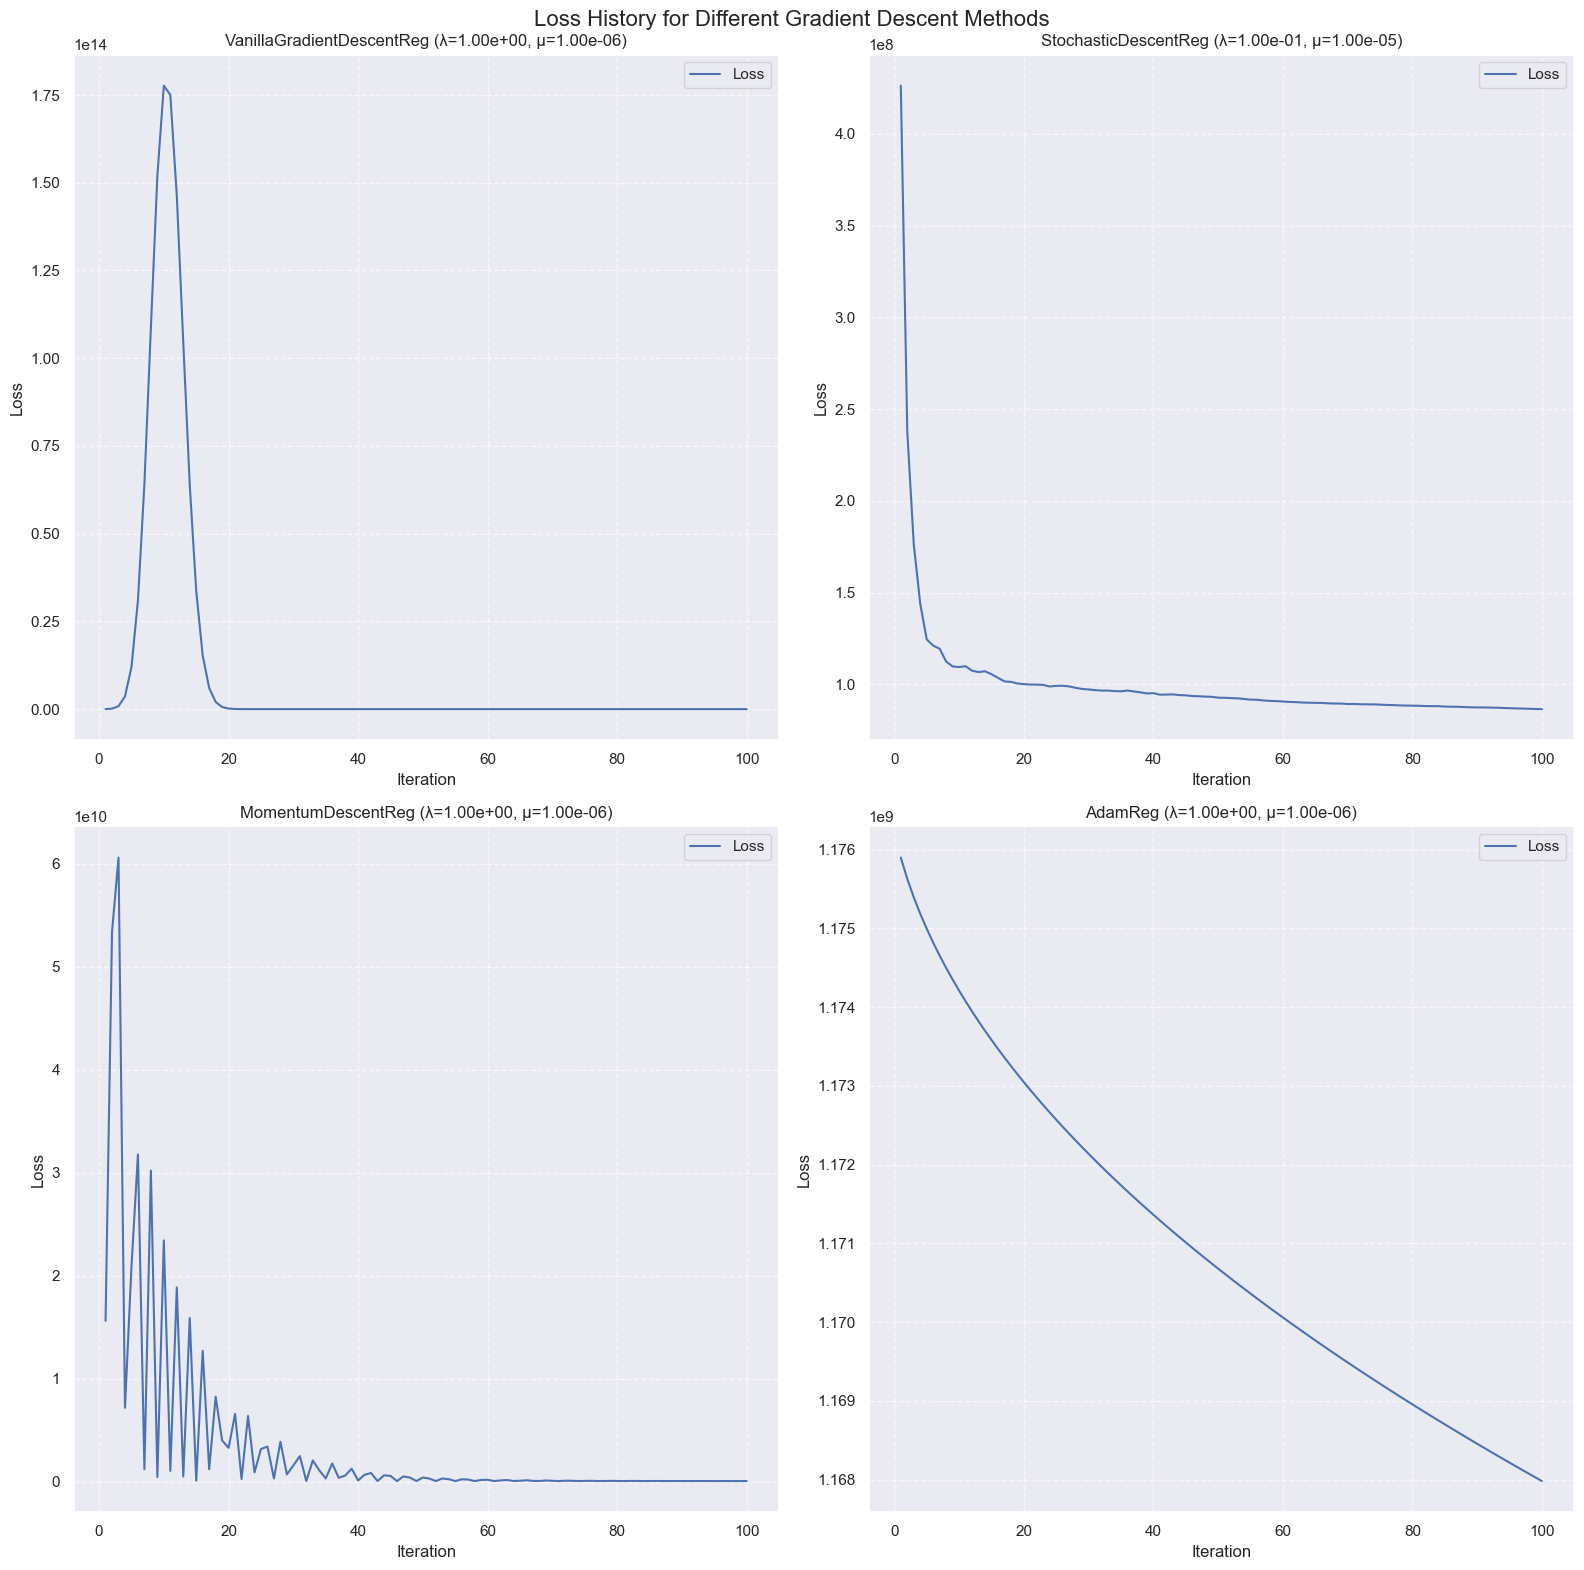

In [692]:
import matplotlib.pyplot as plt

# Настройка фигуры для нескольких подграфиков
fig, axs = plt.subplots(2, 2, figsize=(16, 16))
fig.suptitle('Loss History for Different Gradient Descent Methods', fontsize=16)

# Словарь для сопоставления методов с их подграфиками
method_axs = {
    'VanillaGradientDescentReg': axs[0, 0],
    'StochasticDescentReg': axs[0, 1],
    'MomentumDescentReg': axs[1, 0],
    'AdamReg': axs[1, 1]
}

# Цикл по каждому методу
for method_name, history in loss_histories.items():
    ax = method_axs[method_name]
    ax.plot(range(1, len(history) + 1), history, label='Loss')
    
    # Настройка подграфика
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Loss')
    ax.set_title(f'{method_name} (λ={results[method_name]["best_lambda"]:.2e}, μ={results[method_name]["best_mu"]:.2e})')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.7)

# Настройка макета, чтобы избежать перекрытия подписей
plt.tight_layout()

# Отображение графика
plt.show()

* **Выводы**:
После добавления регуляризации значения изменились не сильно. MomentumDescentReg после регуляризации является наилучшим. 

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

#Генирирование GPT

Чтобы продифференцировать функцию потерь Log-Cosh, мы сначала напишем ее в более удобной для дифференцирования форме:

$$
L(y, a) = \log\left(\frac{e^{a-y} + e^{y-a}}{2}\right)
$$

Теперь мы можем использовать формулу дифференцирования логарифма:

$$
\frac{d}{dx} \log(f(x)) = \frac{1}{f(x)} \cdot \frac{df(x)}{dx}
$$

В нашем случае $f(x) = \frac{e^{a-y} + e^{y-a}}{2}$, поэтому мы можем найти его производную:

$$
\frac{df(x)}{dx} = \frac{1}{2} \left(e^{a-y} \cdot (-1) + e^{y-a} \cdot 1\right) = \frac{e^{y-a} - e^{a-y}}{2}
$$

Теперь мы можем подставить это в формулу дифференцирования логарифма:

$$
\frac{dL}{da} = \frac{1}{\frac{e^{a-y} + e^{y-a}}{2}} \cdot \frac{e^{y-a} - e^{a-y}}{2}
$$

Упрощение:

$$
\frac{dL}{da} = \frac{e^{y-a} - e^{a-y}}{e^{a-y} + e^{y-a}}
$$

Теперь мы можем еще больше упростить, используя тождество:

$$
e^{y-a} - e^{a-y} = \cosh(2y - 2a)
$$

$$
e^{a-y} + e^{y-a} = 2\cosh(a-y)
$$

Подставив эти выражения, получим:

$$
\frac{dL}{da} = \frac{\cosh(2y - 2a)}{2\cosh(a-y)}
$$

На этом этапе мы получили градиент функции потерь Log-Cosh.

In [700]:
import numpy as np
from sklearn.metrics import r2_score
from enum import Enum, auto
from dataclasses import dataclass

@dataclass
class LearningRate:
    lambda_: float = 1e-3
    s0: float = 1
    p: float = 0.5
    iteration: int = 0

    def __call__(self):
        self.iteration += 1
        return self.lambda_ * (self.s0 / (self.s0 + self.iteration)) ** self.p

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

class BaseDescent:
    def __init__(self, dimension: int, lambda_: float = 1e-3, loss_function: LossFunction = LossFunction.LogCosh):
        self.w: np.ndarray = np.random.rand(dimension)
        self.lr: LearningRate = LearningRate(lambda_=lambda_)
        self.loss_function: LossFunction = loss_function

    def step(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        return self.update_weights(self.calc_gradient(x, y))

    def update_weights(self, gradient: np.ndarray) -> np.ndarray:
        raise NotImplementedError

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        raise NotImplementedError

    def calc_loss(self, x: np.ndarray, y: np.ndarray) -> float:
        y_pred = self.predict(x)
        if self.loss_function == LossFunction.LogCosh:
            loss = np.mean(np.logaddexp(y_pred - y, -(y_pred - y)) - np.log(2))
        else:
            raise NotImplementedError(f"Loss function {self.loss_function} is not implemented")
        return loss

    def predict(self, x: np.ndarray) -> np.ndarray:
        return x @ self.w

class VanillaGradientDescent(BaseDescent):
    def update_weights(self, gradient: np.ndarray) -> np.ndarray:
        eta = self.lr()
        weight_diff = -eta * gradient
        self.w += weight_diff
        return weight_diff

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        m = x.shape[0]
        y_pred = self.predict(x)
        if self.loss_function == LossFunction.LogCosh:
            gradient = (1 / m) * x.T @ np.tanh(y_pred - y)
        else:
            raise NotImplementedError(f"Gradient calculation for {self.loss_function} is not implemented")
        return np.array(gradient, dtype=np.float64)

class StochasticDescent(VanillaGradientDescent):
    def __init__(self, dimension: int, lambda_: float = 1e-3, batch_size: int = 50,
                 loss_function: LossFunction = LossFunction.LogCosh):
        super().__init__(dimension, lambda_, loss_function)
        self.batch_size = batch_size

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        batch_indices = np.random.randint(0, x.shape[0], self.batch_size)
        x_batch = x[batch_indices]
        y_batch = y[batch_indices]
        y_pred_batch = self.predict(x_batch)

        if self.loss_function == LossFunction.LogCosh:
            gradient = (1 / self.batch_size) * x_batch.T @ np.tanh(y_pred_batch - y_batch)
        else:
            raise NotImplementedError(f"Gradient calculation for {self.loss_function} is not implemented")
        return gradient

class MomentumDescent(VanillaGradientDescent):
    def __init__(self, dimension: int, lambda_: float = 1e-3, loss_function: LossFunction = LossFunction.LogCosh):
        super().__init__(dimension, lambda_, loss_function)
        self.alpha: float = 0.9
        self.h: np.ndarray = np.zeros(dimension)

    def update_weights(self, gradient: np.ndarray) -> np.ndarray:
        eta = self.lr()
        self.h = self.alpha * self.h + eta * gradient
        weight_diff = -self.h
        self.w += weight_diff
        return weight_diff

class Adam(VanillaGradientDescent):
    def __init__(self, dimension: int, lambda_: float = 1e-3, loss_function: LossFunction = LossFunction.LogCosh):
        super().__init__(dimension, lambda_, loss_function)
        self.eps: float = 1e-8
        self.m: np.ndarray = np.zeros(dimension)
        self.v: np.ndarray = np.zeros(dimension)
        self.beta_1: float = 0.9
        self.beta_2: float = 0.999
        self.iteration_adam: int = 0

    def update_weights(self, gradient: np.ndarray) -> np.ndarray:
        self.iteration_adam += 1
        eta = self.lr()

        self.m = self.beta_1 * self.m + (1 - self.beta_1) * gradient
        self.v = self.beta_2 * self.v + (1 - self.beta_2) * gradient**2

        m_hat = self.m / (1 - self.beta_1**self.iteration_adam)
        v_hat = self.v / (1 - self.beta_2**self.iteration_adam)

        weight_diff = -eta / (np.sqrt(v_hat) + self.eps) * m_hat
        self.w += weight_diff
        return weight_diff

def train_and_evaluate(model, X_train, y_train, X_val, y_val, max_iterations=10000, tolerance=1e-6):
    # Reset learning rate iteration counters
    model.lr.iteration = 0
    if hasattr(model, 'iteration_adam'):
        model.iteration_adam = 0
    if hasattr(model, 'h'):
        model.h = np.zeros(model.w.shape[0])
    if hasattr(model, 'm'):
        model.m = np.zeros(model.w.shape[0])
        model.v = np.zeros(model.w.shape[0])
    model.w = np.random.rand(model.w.shape[0])  # Re-initialize weights

    # Training loop
    prev_loss = float('inf')
    for iteration in range(max_iterations):
        gradient = model.calc_gradient(X_train, y_train)
        weight_diff = model.update_weights(gradient)
        train_loss = model.calc_loss(X_train, y_train)

        # Check for convergence
        if np.isnan(train_loss) or np.isinf(train_loss):
            print("  Training loss is NaN or Inf, skipping this lambda.")
            break
        if abs(prev_loss - train_loss) < tolerance:
            break
        prev_loss = train_loss

    # Compute validation loss
    val_loss = model.calc_loss(X_val, y_val)
    return train_loss, val_loss, iteration + 1, model.w.copy()

# Определите методы, которые хотите оценить
methods = {
    'VanillaGradientDescent': VanillaGradientDescent,
    'StochasticDescent': StochasticDescent,
    'MomentumDescent': MomentumDescent,
    'Adam': Adam,
}

# Определите сетку значений для lambda_ (логарифмическая решётка)
lambda_grid = np.logspace(3, 5, num=7)  # от 1e-6 до 1 (включительно)

# Инициализируем словарь для хранения результатов
results = {}

# Определите критерии сходимости
max_iterations = 100
tolerance = 1e-6

# Получите количество признаков из X_train
num_features = X_train.shape[1]

# Инициализируем словарь для хранения истории потерь
loss_histories = {}

for method_name, method_class in methods.items():
    print(f"Evaluating method: {method_name}")
    best_lambda = None
    best_val_loss = float('inf')
    best_weights = None
    best_iterations = None
    best_model = None  # Для хранения модели с лучшим lambda_

    for lambda_ in lambda_grid:
        print(f"  Testing lambda_: {lambda_}")
        # Инициализируем модель
        if method_name == 'StochasticDescent':
            model = method_class(dimension=num_features, lambda_=lambda_, batch_size=50)
        else:
            model = method_class(dimension=num_features, lambda_=lambda_)
        
        # Сброс счетчиков и инициализация параметров
        model.lr.iteration = 0
        if hasattr(model, 'iteration_adam'):
            model.iteration_adam = 0
        if hasattr(model, 'h'):
            model.h = np.zeros(num_features)
        if hasattr(model, 'm'):
            model.m = np.zeros(num_features)
            model.v = np.zeros(num_features)
        model.w = np.random.rand(num_features)  # Переинициализируем веса
        
        # Цикл обучения
        prev_loss = float('inf')
        for iteration in range(max_iterations):
            gradient = model.calc_gradient(X_train, y_train)
            weight_diff = model.update_weights(gradient)
            train_loss = model.calc_loss(X_train, y_train)
            
            # Проверка критерия сходимости
            if abs(prev_loss - train_loss) < tolerance:
                break
            prev_loss = train_loss
        
        # Вычисляем ошибку на валидационной выборке
        val_loss = model.calc_loss(X_val, y_val)
        print(f"    Validation loss: {val_loss}")
        
        # Обновляем лучший lambda_, если производительность улучшилась
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_lambda = lambda_
            best_weights = model.w.copy()
            best_iterations = iteration + 1  # Добавляем 1, так как итерации начинаются с 0
            best_model = model  # Сохраняем модель с лучшим lambda_
    
    print(f"Best lambda_ for {method_name}: {best_lambda}")
    print(f"Validation loss: {best_val_loss}")
    print(f"Iterations until convergence: {best_iterations}")
    
    # Теперь обучаем модель снова с лучшим lambda_ и собираем историю потерь
    if method_name == 'StochasticDescent':
        model = method_class(dimension=num_features, lambda_=best_lambda, batch_size=50)
    else:
        model = method_class(dimension=num_features, lambda_=best_lambda)
    
    # Сброс счетчиков и инициализация параметров
    model.lr.iteration = 0
    if hasattr(model, 'iteration_adam'):
        model.iteration_adam = 0
    if hasattr(model, 'h'):
        model.h = np.zeros(num_features)
    if hasattr(model, 'm'):
        model.m = np.zeros(num_features)
        model.v = np.zeros(num_features)
    model.w = np.random.rand(num_features)  # Переинициализируем веса
    
    # Инициализируем список для хранения потерь
    loss_history = []
    
    # Цикл обучения с записью истории потерь
    prev_loss = float('inf')
    for iteration in range(max_iterations):
        gradient = model.calc_gradient(X_train, y_train)
        weight_diff = model.update_weights(gradient)
        train_loss = model.calc_loss(X_train, y_train)
        loss_history.append(train_loss)
        
        # Проверка критерия сходимости
        if abs(prev_loss - train_loss) < tolerance:
            break
        prev_loss = train_loss
    
    # Сохраняем историю потерь
    loss_histories[method_name] = loss_history
    
    # Используем веса после сходимости
    w_converged = model.w.copy()
    
    # Вычисляем ошибки на обучающей и тестовой выборках
    train_loss = model.calc_loss(X_train, y_train)
    test_loss = model.calc_loss(X_test, y_test)
    
    # Вычисляем коэффициенты детерминации R²
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Сохраняем результаты
    results[method_name] = {
        'best_lambda': best_lambda,
        'train_loss': train_loss,
        'test_loss': test_loss,
        'r2_train': r2_train,
        'r2_test': r2_test,
        'iterations': iteration + 1  # Добавляем 1, так как итерации начинаются с 0
    }
    
    print(f"Training loss: {train_loss}")
    print(f"Test loss: {test_loss}")
    print(f"R^2 on training set: {r2_train}")
    print(f"R^2 on test set: {r2_test}")
    print(f"Iterations until convergence: {iteration + 1}\n")

# После этого можно также вывести сводку результатов
print("Summary of results:")
for method_name, result in results.items():
    print(f"Method: {method_name}")
    print(f"  Best lambda_: {result['best_lambda']}")
    print(f"  Training loss: {result['train_loss']}")
    print(f"  Test loss: {result['test_loss']}")
    print(f"  R^2 on training set: {result['r2_train']}")
    print(f"  R^2 on test set: {result['r2_test']}")
    print(f"  Iterations until convergence: {result['iterations']}\n")

Evaluating method: VanillaGradientDescent
  Testing lambda_: 1000.0
    Validation loss: 6983.214574202838
  Testing lambda_: 2154.4346900318847
    Validation loss: 6399.309261615477
  Testing lambda_: 4641.588833612777
    Validation loss: 6000.597623806234
  Testing lambda_: 10000.0
    Validation loss: 5741.8661265948695
  Testing lambda_: 21544.346900318822
    Validation loss: 5586.884386681155
  Testing lambda_: 46415.888336127726
    Validation loss: 8011.611960852855
  Testing lambda_: 100000.0
    Validation loss: 21162.503667900564
Best lambda_ for VanillaGradientDescent: 21544.346900318822
Validation loss: 5586.884386681155
Iterations until convergence: 100
Training loss: 5345.750794285527
Test loss: 5479.9857970921585
R^2 on training set: 0.44597606522049105
R^2 on test set: 0.46383164180958114
Iterations until convergence: 100

Evaluating method: StochasticDescent
  Testing lambda_: 1000.0
    Validation loss: 7003.421441249956
  Testing lambda_: 2154.4346900318847
    Va

* **Выводы**:r^2 при использовании функции потерь log-cosh лучше,чем при использовании mse на всех методах градиентого спуска. Необходимо грамотно подбирать параметры,чтобы log-cosh показывало хорошие результаты. Также необходимо дополнительно поработать с настройкой гиперпараметров MSE тогда качество моделей возможно улучшить на каждом методе градиентного спуска. 

### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

`### ваш кулинарный опыт тут ###`


### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [ ]:
# YOUR CODE:

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты _(требуется показать не только результат, но и промежуточные вычисления)_:

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [701]:
import numpy as np
from dataclasses import dataclass
from enum import Enum, auto

@dataclass
class LearningRate:
    lambda_: float = 1e-3
    s0: float = 1
    p: float = 0.5
    iteration: int = 0

    def __call__(self):
        self.iteration += 1
        return self.lambda_ * (self.s0 / (self.s0 + self.iteration)) ** self.p

class LossFunction(Enum):
    MAE = auto()
    Huber = auto()

class BaseDescent:
    def __init__(self, dimension: int, lambda_: float = 1e-3, loss_function: LossFunction = LossFunction.MAE, delta: float = 1.0):
        self.w: np.ndarray = np.random.rand(dimension)
        self.lr: LearningRate = LearningRate(lambda_=lambda_)
        self.loss_function: LossFunction = loss_function
        self.delta: float = delta  # Delta parameter for Huber loss

    def step(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        return self.update_weights(self.calc_gradient(x, y))

    def update_weights(self, gradient: np.ndarray) -> np.ndarray:
        raise NotImplementedError

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        raise NotImplementedError

    def calc_loss(self, x: np.ndarray, y: np.ndarray) -> float:
        y_pred = self.predict(x)
        if self.loss_function == LossFunction.MAE:
            loss = np.mean(np.abs(y_pred - y))
        elif self.loss_function == LossFunction.Huber:
            error = y_pred - y
            loss = np.mean(np.where(np.abs(error) <= self.delta, 0.5 * error**2, self.delta * (np.abs(error) - 0.5 * self.delta)))
        else:
            raise NotImplementedError(f"Loss function {self.loss_function} is not implemented")
        return loss

    def predict(self, x: np.ndarray) -> np.ndarray:
        return x @ self.w

class VanillaGradientDescent(BaseDescent):
    def update_weights(self, gradient: np.ndarray) -> np.ndarray:
        eta = self.lr()
        weight_diff = -eta * gradient
        self.w += weight_diff
        return weight_diff

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        m = x.shape[0]
        y_pred = self.predict(x)
        if self.loss_function == LossFunction.MAE:
            gradient = (1 / m) * x.T @ np.sign(y_pred - y)
        elif self.loss_function == LossFunction.Huber:
            error = y_pred - y
            gradient = (1 / m) * x.T @ np.where(np.abs(error) <= self.delta, error, self.delta * np.sign(error))
        else:
            raise NotImplementedError(f"Gradient calculation for {self.loss_function} is not implemented")
        return np.array(gradient, dtype=np.float64)

class StochasticDescent(VanillaGradientDescent):
    def __init__(self, dimension: int, lambda_: float = 1e-3, batch_size: int = 50,
                 loss_function: LossFunction = LossFunction.MAE, delta: float = 1.0):
        super().__init__(dimension, lambda_, loss_function, delta)
        self.batch_size = batch_size

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        batch_indices = np.random.randint(0, x.shape[0], self.batch_size)
        x_batch = x[batch_indices]
        y_batch = y[batch_indices]
        y_pred_batch = self.predict(x_batch)

        if self.loss_function == LossFunction.MAE:
            gradient = (1 / self.batch_size) * x_batch.T @ np.sign(y_pred_batch - y_batch)
        elif self.loss_function == LossFunction.Huber:
            error = y_pred_batch - y_batch
            gradient = (1 / self.batch_size) * x_batch.T @ np.where(np.abs(error) <= self.delta, error, self.delta * np.sign(error))
        else:
            raise NotImplementedError(f"Gradient calculation for {self.loss_function} is not implemented")
        return gradient

class MomentumDescent(VanillaGradientDescent):
    def __init__(self, dimension: int, lambda_: float = 1e-3, loss_function: LossFunction = LossFunction.MAE, delta: float = 1.0):
        super().__init__(dimension, lambda_, loss_function, delta)
        self.alpha: float = 0.9
        self.h: np.ndarray = np.zeros(dimension)

    def update_weights(self, gradient: np.ndarray) -> np.ndarray:
        eta = self.lr()
        self.h = self.alpha * self.h + eta * gradient
        weight_diff = -self.h
        self.w += weight_diff
        return weight_diff

class Adam(VanillaGradientDescent):
    def __init__(self, dimension: int, lambda_: float = 1e-3, loss_function: LossFunction = LossFunction.MAE, delta: float = 1.0):
        super().__init__(dimension, lambda_, loss_function, delta)
        self.eps: float = 1e-8
        self.m: np.ndarray = np.zeros(dimension)
        self.v: np.ndarray = np.zeros(dimension)
        self.beta_1: float = 0.9
        self.beta_2: float = 0.999
        self.iteration_adam: int = 0

    def update_weights(self, gradient: np.ndarray) -> np.ndarray:
        self.iteration_adam += 1
        eta = self.lr()

        self.m = self.beta_1 * self.m + (1 - self.beta_1) * gradient
        self.v = self.beta_2 * self.v + (1 - self.beta_2) * gradient**2

        m_hat = self.m / (1 - self.beta_1**self.iteration_adam)
        v_hat = self.v / (1 - self.beta_2**self.iteration_adam)

        weight_diff = -eta / (np.sqrt(v_hat) + self.eps) * m_hat
        self.w += weight_diff
        return weight_diff

def train_and_evaluate(model, X_train, y_train, X_val, y_val, max_iterations, tolerance):
    prev_loss = float('inf')
    for i in range(max_iterations):
        model.step(X_train, y_train)
        current_loss = model.calc_loss(X_val, y_val)
        if abs(prev_loss - current_loss) < tolerance:
            break
        prev_loss = current_loss
    return model.calc_loss(X_train, y_train), current_loss, i + 1, model.w

# Определите методы, которые хотите оценить
methods = {
    'VanillaGradientDescent': VanillaGradientDescent,
    'StochasticDescent': StochasticDescent,
    'MomentumDescent': MomentumDescent,
    'Adam': Adam,
}

# Определите сетку значений для lambda_ (логарифмическая решётка)
lambda_grid = np.logspace(3, 5, num=7)  # от 1e-6 до 1 (включительно)

# Инициализируем словарь для хранения результатов
results = {}

# Определите критерии сходимости
max_iterations = 100
tolerance = 1e-6

# Получите количество признаков из X_train
num_features = X_train.shape[1]

# Инициализируем словарь для хранения истории потерь
loss_histories = {}

for method_name, method_class in methods.items():
    print(f"Evaluating method: {method_name}")
    best_lambda = None
    best_val_loss = float('inf')
    best_weights = None
    best_iterations = None
    best_model = None  # Для хранения модели с лучшим lambda_

    for lambda_ in lambda_grid:
        print(f"  Testing lambda_: {lambda_}")
        # Инициализируем модель
        if method_name == 'StochasticDescent':
            model = method_class(dimension=num_features, lambda_=lambda_, batch_size=50)
        else:
            model = method_class(dimension=num_features, lambda_=lambda_)
        
        # Сброс счетчиков и инициализация параметров
        model.lr.iteration = 0
        if hasattr(model, 'iteration_adam'):
            model.iteration_adam = 0
        if hasattr(model, 'h'):
            model.h = np.zeros(num_features)
        if hasattr(model, 'm'):
            model.m = np.zeros(num_features)
            model.v = np.zeros(num_features)
        model.w = np.random.rand(num_features)  # Переинициализируем веса
        
        # Цикл обучения
        prev_loss = float('inf')
        for iteration in range(max_iterations):
            gradient = model.calc_gradient(X_train, y_train)
            weight_diff = model.update_weights(gradient)
            train_loss = model.calc_loss(X_train, y_train)
            
            # Проверка критерия сходимости
            if abs(prev_loss - train_loss) < tolerance:
                break
            prev_loss = train_loss
        
        # Вычисляем ошибку на валидационной выборке
        val_loss = model.calc_loss(X_val, y_val)
        print(f"    Validation loss: {val_loss}")
        
        # Обновляем лучший lambda_, если производительность улучшилась
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_lambda = lambda_
            best_weights = model.w.copy()
            best_iterations = iteration + 1  # Добавляем 1, так как итерации начинаются с 0
            best_model = model  # Сохраняем модель с лучшим lambda_
    
    print(f"Best lambda_ for {method_name}: {best_lambda}")
    print(f"Validation loss: {best_val_loss}")
    print(f"Iterations until convergence: {best_iterations}")
    
    # Теперь обучаем модель снова с лучшим lambda_ и собираем историю потерь
    if method_name == 'StochasticDescent':
        model = method_class(dimension=num_features, lambda_=best_lambda, batch_size=50)
    else:
        model = method_class(dimension=num_features, lambda_=best_lambda)
    
    # Сброс счетчиков и инициализация параметров
    model.lr.iteration = 0
    if hasattr(model, 'iteration_adam'):
        model.iteration_adam = 0
    if hasattr(model, 'h'):
        model.h = np.zeros(num_features)
    if hasattr(model, 'm'):
        model.m = np.zeros(num_features)
        model.v = np.zeros(num_features)
    model.w = np.random.rand(num_features)  # Переинициализируем веса
    
    # Инициализируем список для хранения потерь
    loss_history = []
    
    # Цикл обучения с записью истории потерь
    prev_loss = float('inf')
    for iteration in range(max_iterations):
        gradient = model.calc_gradient(X_train, y_train)
        weight_diff = model.update_weights(gradient)
        train_loss = model.calc_loss(X_train, y_train)
        loss_history.append(train_loss)
        
        # Проверка критерия сходимости
        if abs(prev_loss - train_loss) < tolerance:
            break
        prev_loss = train_loss
    
    # Сохраняем историю потерь
    loss_histories[method_name] = loss_history
    
    # Используем веса после сходимости
    w_converged = model.w.copy()
    
    # Вычисляем ошибки на обучающей и тестовой выборках
    train_loss = model.calc_loss(X_train, y_train)
    test_loss = model.calc_loss(X_test, y_test)
    
    # Вычисляем коэффициенты детерминации R²
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Сохраняем результаты
    results[method_name] = {
        'best_lambda': best_lambda,
        'train_loss': train_loss,
        'test_loss': test_loss,
        'r2_train': r2_train,
        'r2_test': r2_test,
        'iterations': iteration + 1  # Добавляем 1, так как итерации начинаются с 0
    }
    
    print(f"Training loss: {train_loss}")
    print(f"Test loss: {test_loss}")
    print(f"R^2 on training set: {r2_train}")
    print(f"R^2 on test set: {r2_test}")
    print(f"Iterations until convergence: {iteration + 1}\n")

# После этого можно также вывести сводку результатов
print("Summary of results:")
for method_name, result in results.items():
    print(f"Method: {method_name}")
    print(f"  Best lambda_: {result['best_lambda']}")
    print(f"  Training loss: {result['train_loss']}")
    print(f"  Test loss: {result['test_loss']}")
    print(f"  R^2 on training set: {result['r2_train']}")
    print(f"  R^2 on test set: {result['r2_test']}")
    print(f"  Iterations until convergence: {result['iterations']}\n")

Evaluating method: VanillaGradientDescent
  Testing lambda_: 1000.0
    Validation loss: 6983.885332610124
  Testing lambda_: 2154.4346900318847
    Validation loss: 6400.051484167177
  Testing lambda_: 4641.588833612777
    Validation loss: 6001.2877228203315
  Testing lambda_: 10000.0
    Validation loss: 5742.56072157745
  Testing lambda_: 21544.346900318822
    Validation loss: 5587.278145423638
  Testing lambda_: 46415.888336127726
    Validation loss: 8006.605474566775
  Testing lambda_: 100000.0
    Validation loss: 21181.39281269507
Best lambda_ for VanillaGradientDescent: 21544.346900318822
Validation loss: 5587.278145423638
Iterations until convergence: 100
Training loss: 5346.460251420393
Test loss: 5480.685481995568
R^2 on training set: 0.4458481353473869
R^2 on test set: 0.4637045132942317
Iterations until convergence: 100

Evaluating method: StochasticDescent
  Testing lambda_: 1000.0
    Validation loss: 6981.80100606693
  Testing lambda_: 2154.4346900318847
    Validati